In [93]:
import foton
import kontrol
import matplotlib.pyplot as plt
import numpy as np
import vishack

# SRCL FM on
# FM 1, 2, 3, 4, 7, 9, 10
# Gain = 0.4
# Plant from M3 -> M3: FM 5

# M2 LOCK FM on
# FM 1, 2, 3, 4, 5, 9
# Gain = 1.3
# Plant from M2 -> M3: FM 10

# M1 LOCK FM on
# FM 1,
# Gain = 1
# Plant from M1 -> M2: FM 10

# M3 LOCK FM on
# FM None
# Gain = 1
# Plant in SRCL module.
# Gain in DRIVEALIGN L2L = 1.5.

# Load SRCL filters
# print(foton.__doc__)

In [60]:
# Load SRCL filters

# SRCL FM on
# FM 1, 2, 3, 4, 7, 9, 10
# Gain = 0.4
# Plant from M3 -> M3: FM 5

srcl_ff = foton.FilterFile("foton_files/L1LSC.txt")
srcl_module = "LSC_SRCL"
srcl_bank = srcl_ff[srcl_module]
srcl_fm1 = srcl_bank[0]
srcl_fm2 = srcl_bank[1]
srcl_fm3 = srcl_bank[2]
srcl_fm4 = srcl_bank[3]
srcl_fm5 = srcl_bank[4]
srcl_fm6 = srcl_bank[5]
srcl_fm7 = srcl_bank[6]
srcl_fm8 = srcl_bank[7]
srcl_fm9 = srcl_bank[8]
srcl_fm10 = srcl_bank[9]

srcl_fm1_tf = kontrol.core.foton.get_zpk2tf(srcl_fm1.get_zpk())
srcl_fm2_tf = kontrol.core.foton.get_zpk2tf(srcl_fm2.get_zpk())
srcl_fm3_tf = kontrol.core.foton.get_zpk2tf(srcl_fm3.get_zpk())
srcl_fm4_tf = kontrol.core.foton.get_zpk2tf(srcl_fm4.get_zpk())
srcl_fm5_tf = kontrol.core.foton.get_zpk2tf(srcl_fm5.get_zpk())
srcl_fm6_tf = kontrol.core.foton.get_zpk2tf(srcl_fm6.get_zpk())
srcl_fm7_tf = kontrol.core.foton.get_zpk2tf(srcl_fm7.get_zpk())
srcl_fm8_tf = kontrol.core.foton.get_zpk2tf(srcl_fm8.get_zpk())
srcl_fm9_tf = kontrol.core.foton.get_zpk2tf(srcl_fm9.get_zpk())
srcl_fm10_tf = kontrol.core.foton.get_zpk2tf(srcl_fm10.get_zpk())

srcl_k = 0.4 * srcl_fm1_tf * srcl_fm2_tf * srcl_fm3_tf * srcl_fm4_tf * srcl_fm7_tf * srcl_fm9_tf * srcl_fm10_tf 

m3_m3_tf = -srcl_fm5_tf  # LIGO has a negative plant convention.

In [61]:
# Load M2 filters

# M2 LOCK FM on
# FM 1, 2, 3, 4, 5, 9
# Gain = 1.3
# Plant from M2 -> M3: FM 10

m2_ff = foton.FilterFile("foton_files/L1SUSSR2.txt")
m2_module = "SR2_M2_LOCK_L"
m2_bank = m2_ff[m2_module]
m2_fm1 = m2_bank[0]
m2_fm2 = m2_bank[1]
m2_fm3 = m2_bank[2]
m2_fm4 = m2_bank[3]
m2_fm5 = m2_bank[4]
m2_fm6 = m2_bank[5]
m2_fm7 = m2_bank[6]
m2_fm8 = m2_bank[7]
m2_fm9 = m2_bank[8]
m2_fm10 = m2_bank[9]

m2_fm1_tf = kontrol.core.foton.get_zpk2tf(m2_fm1.get_zpk())
m2_fm2_tf = kontrol.core.foton.get_zpk2tf(m2_fm2.get_zpk())
m2_fm3_tf = kontrol.core.foton.get_zpk2tf(m2_fm3.get_zpk())
m2_fm4_tf = kontrol.core.foton.get_zpk2tf(m2_fm4.get_zpk())
m2_fm5_tf = kontrol.core.foton.get_zpk2tf(m2_fm5.get_zpk())
m2_fm6_tf = kontrol.core.foton.get_zpk2tf(m2_fm6.get_zpk())
m2_fm7_tf = kontrol.core.foton.get_zpk2tf(m2_fm7.get_zpk())
m2_fm8_tf = kontrol.core.foton.get_zpk2tf(m2_fm8.get_zpk())
m2_fm9_tf = kontrol.core.foton.get_zpk2tf(m2_fm9.get_zpk())
m2_fm10_tf = kontrol.core.foton.get_zpk2tf(m2_fm10.get_zpk())

m2_k = 1.3 * m2_fm1_tf * m2_fm2_tf * m2_fm3_tf * m2_fm4_tf * m2_fm5_tf * m2_fm9_tf

m2_m3_tf = m2_fm10_tf  # No negative here.

In [69]:
# Load M1 filters

# M1 LOCK FM on
# FM 1,
# Gain = 1
# Plant from M1 -> M2: FM 10

m1_ff = foton.FilterFile("foton_files/L1SUSSR2.txt")
m1_module = "SR2_M1_LOCK_L"
m1_bank = m1_ff[m1_module]
m1_fm1 = m1_bank[0]

m1_fm10 = m1_bank[9]

m1_fm1_tf = kontrol.core.foton.get_zpk2tf(m1_fm1.get_zpk())
m1_fm10_tf = kontrol.core.foton.get_zpk2tf(m1_fm10.get_zpk())

m1_k = 1 * m1_fm1_tf

m1_m2_tf = -m1_fm10_tf  # LIGO has a negative plant convention.

In [71]:
m3_m3_gain = 1.5

In [212]:
k_srcl = srcl_k
k_m3 = m3_m3_gain
k_m2 = m2_k
k_m1 = m1_k
p_12 = m1_m2_tf 
p_23 = m2_m3_tf
p_33 = m3_m3_tf * 4
p_13 = p_12*p_23

p_13 *= 0.2548 / abs((k_m1*k_m2*p_13)(1j*2*np.pi*1))
p_23 *= 1.848 / abs((k_m2*p_23)(1j*2*np.pi*1))

f = np.logspace(-0, 2, 1024)
oltf = ((k_m3*p_33)(1j*2*np.pi*f) + (k_m2*p_23*p_33)(1j*2*np.pi*f) + (k_m2*k_m1*p_13*p_33)(1j*2*np.pi*f)) * k_srcl(1j*2*np.pi*f)
# oltf = ((k_m3*p_33)(1j*2*np.pi*f)) * k_srcl(1j*2*np.pi*f)

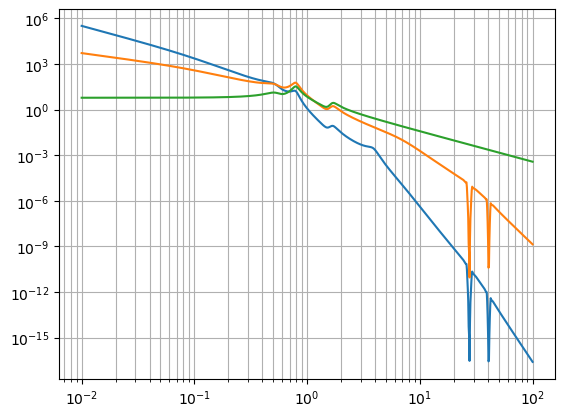

In [210]:
plt.loglog(f, abs((k_m1*k_m2*p_13*p_33)(1j*2*np.pi*f)))
plt.loglog(f, abs((k_m2*p_23*p_33)(1j*2*np.pi*f)))
plt.loglog(f, abs((k_m3*p_33)(1j*2*np.pi*f)))
# plt.axhline(k_m3, color="C2")
plt.grid(which="both")
# plt.loglog(f, abs((k_m3)(1j*2*np.pi*f)))
# plt.loglog(f, abs(p_23(1j*2*np.pi*f)))
# plt.loglog(f, abs(p_33(1j*2*np.pi*f)))
# plt.loglog(f, abs(p_13(1j*2*np.pi*f)))

In [195]:
# load measurement
data = vishack.data.diaggui.Diaggui("data/240228-SRCL_LN_45W.xml")
f_ = data.items.results.TF["L1:LSC-SRCL_IN2"].FHz
oltf_meas = data.items.results.TF["L1:LSC-SRCL_IN2"].xfer[1]
# f_, oltf_meas = data.tf("L1:LSC-SRCL_IN1", "L1:LSC-SRCL_IN1")

Text(0.5, 0, 'Frequency (Hz)')

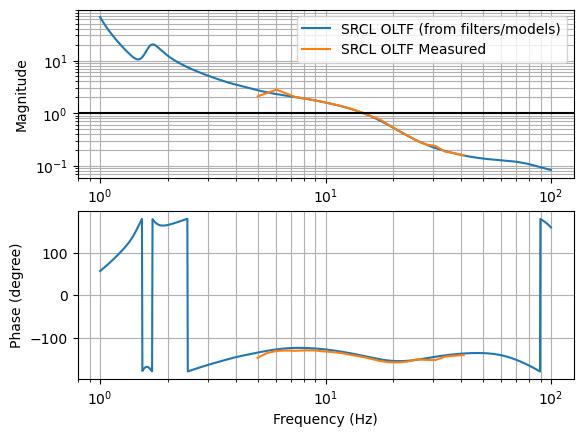

In [218]:
# f = np.logspace(-2, 3, 1024)

plt.subplot(211)
plt.loglog(f, abs(oltf), label="SRCL OLTF (from filters/models)")
plt.loglog(f_, abs(oltf_meas), label="SRCL OLTF Measured")
plt.axhline(1, color="k")
plt.legend(loc=0)
plt.grid(which="both")
plt.ylabel("Magnitude")

plt.subplot(212)
plt.semilogx(f, np.angle(oltf, deg=True))
plt.semilogx(f_, np.angle(-oltf_meas.conj(), deg=True))
plt.grid(which="both")
plt.ylabel("Phase (degree)")
plt.xlabel("Frequency (Hz)")